# Data Wrangling and SQL Pacmann - Olist Brazilian E-Commerce

## Data Import

In [1]:
# Library for import database data format
import sqlite3

# Library cleaning and preprocessing data
import pandas as pd
import numpy as np
import datetime as dt

# Library for visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Library to ignore future warning 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Loading

In [2]:
# creating connection
conn = sqlite3.connect('olist.db')

# lihat list table
df = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
df

,name
0,olist_order_customer_dataset
1,olist_order_dataset
2,olist_order_reviews_dataset
3,olist_order_payments_dataset
4,olist_order_items_dataset
5,olist_products_dataset
6,olist_sellers_dataset
7,olist_geolocation_dataset
8,product_category_name_translation


In [3]:
# customer dataset
customer = pd.read_sql_query(
    """
    SELECT *
    FROM olist_order_customer_dataset;
    """, conn)

# order dataset
order = pd.read_sql_query(
    """
    SELECT * 
    FROM olist_order_dataset;
    """, conn)

# review dataset
review = pd.read_sql_query(
    """
    SELECT * 
    FROM olist_order_reviews_dataset;
    """, conn)

# payment dataset
payment = pd.read_sql_query(
    """
    SELECT * 
    FROM olist_order_payments_dataset;
    """, conn)
    
# order items dataset
item = pd.read_sql_query(
    """
    SELECT *
    FROM olist_order_items_dataset;
    """, conn)
    
# category name translation dataset
category = pd.read_sql_query(
    """
    SELECT *
    FROM product_category_name_translation;
    """, conn)

# product dataset
product = pd.read_sql_query(
    """
    SELECT *
    FROM olist_products_dataset;
    """, conn)

# seller dataset
seller = pd.read_sql_query(
    """
    SELECT *
    FROM olist_sellers_dataset;
    """, conn)

# geolocation dataset
geolocation = pd.read_sql_query(
    """
    SELECT *
    FROM olist_geolocation_dataset;
    """, conn)

## Data Merge

In [4]:
df = pd.merge(order, item, on='order_id', how='left')
df = pd.merge(df, product, on='product_id', how='inner')
df = pd.merge(df, payment, on='order_id', how = 'left')
df = pd.merge(df, review, on='order_id', how='left')
df = pd.merge(df, customer, on='customer_id', how='right')
df = pd.merge(df, category, on='product_category_name')

In [5]:
# Show all columns 
pd.set_option('display.max_columns', len(df.columns)) 
pd.set_option('display.max_rows', 110) 
df.head()

,index_x,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,index_y,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,index_x,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,index_y,payment_sequential,payment_type,payment_installments,payment_value,index_x,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,index_y,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,index,product_category_name_english
0,88492.0,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,373.0,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,32209.0,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,19778.0,1.0,credit_card,2.0,146.87,24307.0,88b8b52d46df026a9d1ad2136a59b30b,4.0,None,None,2017-05-26 00:00:00,2017-05-30 22:34:40,0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,30,office_furniture
1,22557.0,b2059ed67ce144a36e2aa97d2c9e9ad2,4e7b3e00288586ebd08712fdd0374a03,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,78217.0,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,9407.0,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,73071.0,1.0,credit_card,7.0,157.73,43730.0,5ad6695d76ee186dc473c42706984d87,5.0,None,None,2018-06-15 00:00:00,2018-06-15 12:10:59,2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,30,office_furniture
2,32180.0,951670f92359f4fe4a63112aa7306eba,b2b6027bc5c5109e529d4dc6358b12c3,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,65237.0,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,6500.0,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,6981.0,1.0,credit_card,1.0,173.30,71676.0,059a801bb31f6aab2266e672cab87bc5,5.0,None,None,2018-03-29 00:00:00,2018-04-02 18:36:47,3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,30,office_furniture
3,22028.0,997fd4b37386d10b57d4ac8cdec011a6,4c06b42fbf7b97ab10779cda5549cd1c,delivered,2018-07-08 09:59:19,2018-07-08 10:30:15,2018-07-25 15:12:00,2018-08-08 19:42:53,2018-08-16 00:00:00,67153.0,1.0,8ed094bfe076c568f6bb10feada3f75d,7c67e1448b00f6e969d365cea6b010ab,2018-07-26 10:30:15,199.98,115.77,6753.0,moveis_escritorio,43.0,1128.0,1.0,16133.0,63.0,59.0,25.0,69809.0,1.0,credit_card,6.0,315.75,24313.0,2518803238cabbf63564593e4a8fc52d,1.0,Nada de produto,"Ainda não recebi o produto. Sendo assim, não p...",2018-08-09 00:00:00,2018-08-14 11:40:54,38,07d190f123147d9e89d4b922543d7948,65075,sao luis,MA,30,office_furniture
4,47990.0,b63fff1ef8b6201df68bb611ee41129e,8276de07ef25225d412b8462d73f8664,delivered,2017-04-02 22:15:27,2017-04-04 05:55:19,2017-04-13 16:28:06,2017-05-02 13:53:25,2017-05-08 00:00:00,80110.0,1.0,aba86c093ccdbac75b09111d57e50004,7c67e1448b00f6e969d365cea6b010ab,2017-04-17 05:55:19,129.60,16.61,6349.0,moveis_escritorio,41.0,154.0,1.0,2600.0,40.0,45.0,39.0,53245.0,1.0,boleto,1.0,146.21,88481.0,84467f1766775ba4c14fc25b3ca67905,4.0,None,"A crítica é à entrega, pois por se tratar dos ...",2017-05-03 00:00:00,2017-05-03 21:06:33,63,332cf4e83e16004ba7dca932ce82475b,90010,porto alegre,RS,30,office_furniture


In [6]:
# Dataset dimension
row, col = df.shape

print(f"Total columns: {col}")
print(f"Total rows: {row}")

Total columns: 44
Total rows: 116576


In [7]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116576 entries, 0 to 116575
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   index_x                        116576 non-null  float64
 1   order_id                       116576 non-null  object 
 2   customer_id                    116576 non-null  object 
 3   order_status                   116576 non-null  object 
 4   order_purchase_timestamp       116576 non-null  object 
 5   order_approved_at              116562 non-null  object 
 6   order_delivered_carrier_date   115363 non-null  object 
 7   order_delivered_customer_date  114061 non-null  object 
 8   order_estimated_delivery_date  116576 non-null  object 
 9   index_y                        116576 non-null  float64
 10  order_item_id                  116576 non-null  float64
 11  product_id                     116576 non-null  object 
 12  seller_id                     

In [8]:
# Drop columns that not necessary in analysis
df = df.drop(columns=['index', 'index_x','index_y','shipping_limit_date','product_category_name', 'product_name_lenght', 'product_description_lenght', 'order_delivered_carrier_date',
                       'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm','payment_installments', 'order_delivered_customer_date', 'review_id', 
                       'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'customer_id', 'order_approved_at', 'order_item_id']) 
df.head()

,order_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,product_id,seller_id,price,freight_value,product_photos_qty,payment_sequential,payment_type,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english
0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-06-05 00:00:00,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,1.0,1.0,credit_card,146.87,4.0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,office_furniture
1,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-06-13 00:00:00,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,1.0,1.0,credit_card,157.73,5.0,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,office_furniture
2,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-04-10 00:00:00,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36,1.0,1.0,credit_card,173.30,5.0,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,office_furniture
3,997fd4b37386d10b57d4ac8cdec011a6,delivered,2018-07-08 09:59:19,2018-08-16 00:00:00,8ed094bfe076c568f6bb10feada3f75d,7c67e1448b00f6e969d365cea6b010ab,199.98,115.77,1.0,1.0,credit_card,315.75,1.0,07d190f123147d9e89d4b922543d7948,65075,sao luis,MA,office_furniture
4,b63fff1ef8b6201df68bb611ee41129e,delivered,2017-04-02 22:15:27,2017-05-08 00:00:00,aba86c093ccdbac75b09111d57e50004,7c67e1448b00f6e969d365cea6b010ab,129.60,16.61,1.0,1.0,boleto,146.21,4.0,332cf4e83e16004ba7dca932ce82475b,90010,porto alegre,RS,office_furniture


In [9]:
# Rename column
df = df.rename(columns={"product_category_name_english": "product_category_name"})

In [10]:
# check duplicates
df[df.duplicated(keep=False)]

,order_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,product_id,seller_id,price,freight_value,product_photos_qty,payment_sequential,payment_type,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name
8,c43d312cae83cf5e4a99152bf27be2ee,delivered,2017-07-28 20:25:12,2017-08-25 00:00:00,e8316a4667e5870c85e906b1f062bde1,7c67e1448b00f6e969d365cea6b010ab,90.99,28.00,1.0,1.0,credit_card,237.98,5.0,c1c7632732a487b1221e7bfb627c575f,24220,niteroi,RJ,office_furniture
9,c43d312cae83cf5e4a99152bf27be2ee,delivered,2017-07-28 20:25:12,2017-08-25 00:00:00,e8316a4667e5870c85e906b1f062bde1,7c67e1448b00f6e969d365cea6b010ab,90.99,28.00,1.0,1.0,credit_card,237.98,5.0,c1c7632732a487b1221e7bfb627c575f,24220,niteroi,RJ,office_furniture
14,cee3d35c01c3ae1ed31809bdb2272afb,delivered,2017-07-24 22:26:44,2017-08-17 00:00:00,6f842ad54a86bf94d9254744d910ec56,7c67e1448b00f6e969d365cea6b010ab,79.99,24.87,1.0,1.0,boleto,419.44,5.0,d36fc675519adcbd1e824cabc25bda07,15010,sao jose do rio preto,SP,office_furniture
15,cee3d35c01c3ae1ed31809bdb2272afb,delivered,2017-07-24 22:26:44,2017-08-17 00:00:00,6f842ad54a86bf94d9254744d910ec56,7c67e1448b00f6e969d365cea6b010ab,79.99,24.87,1.0,1.0,boleto,419.44,5.0,d36fc675519adcbd1e824cabc25bda07,15010,sao jose do rio preto,SP,office_furniture
16,cee3d35c01c3ae1ed31809bdb2272afb,delivered,2017-07-24 22:26:44,2017-08-17 00:00:00,6f842ad54a86bf94d9254744d910ec56,7c67e1448b00f6e969d365cea6b010ab,79.99,24.87,1.0,1.0,boleto,419.44,5.0,d36fc675519adcbd1e824cabc25bda07,15010,sao jose do rio preto,SP,office_furniture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116528,3ed26cafd58917f71e9044701fe9e7cb,delivered,2017-08-31 18:54:14,2017-09-19 00:00:00,ec5b3c8bb77ad22278f6e9d719a83de3,4a3ca9315b744ce9f8e9374361493884,12.90,11.85,1.0,1.0,credit_card,49.50,5.0,6f1b52490e2f1dfbb7cd7309230dbb36,5021,sao paulo,SP,home_comfort_2
116529,3ed26cafd58917f71e9044701fe9e7cb,delivered,2017-08-31 18:54:14,2017-09-19 00:00:00,ec5b3c8bb77ad22278f6e9d719a83de3,4a3ca9315b744ce9f8e9374361493884,12.90,11.85,1.0,1.0,credit_card,49.50,5.0,6f1b52490e2f1dfbb7cd7309230dbb36,5021,sao paulo,SP,home_comfort_2
116535,688c77c72e79654a39228923333fc18f,delivered,2017-10-28 07:10:49,2017-11-21 00:00:00,ec5b3c8bb77ad22278f6e9d719a83de3,4a3ca9315b744ce9f8e9374361493884,12.90,15.10,1.0,1.0,credit_card,84.00,NaN,09fe8ab1462ab9578e8b5ca1bcf63947,22783,rio de janeiro,RJ,home_comfort_2
116536,688c77c72e79654a39228923333fc18f,delivered,2017-10-28 07:10:49,2017-11-21 00:00:00,ec5b3c8bb77ad22278f6e9d719a83de3,4a3ca9315b744ce9f8e9374361493884,12.90,15.10,1.0,1.0,credit_card,84.00,NaN,09fe8ab1462ab9578e8b5ca1bcf63947,22783,rio de janeiro,RJ,home_comfort_2


In [11]:
# sum all missing value in dataset and keep only columns with missing value > 0
nan_col = df.isnull().sum()[df.isnull().sum() > 0]

# construct a dataframe consists of NaN count and NaN percentage
nan_col_olist = pd.DataFrame({'NaN_count': nan_col, 'NaN_percentage': nan_col / len(df) * 100}).sort_values(by = 'NaN_percentage', ascending = False)

# missing value information
nan_col_olist

,NaN_count,NaN_percentage
review_score,964,0.826928
payment_sequential,3,0.002573
payment_type,3,0.002573
payment_value,3,0.002573


In [12]:
# Check missing value on columns payment sequential, payment type, and payment value
df[df['payment_type'].isnull()]

,order_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,product_id,seller_id,price,freight_value,product_photos_qty,payment_sequential,payment_type,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name
51502,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-10-04 00:00:00,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99,2.83,1.0,NaN,NaN,NaN,1.0,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,health_beauty
51503,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-10-04 00:00:00,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99,2.83,1.0,NaN,NaN,NaN,1.0,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,health_beauty
51504,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-10-04 00:00:00,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99,2.83,1.0,NaN,NaN,NaN,1.0,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,health_beauty


In [13]:
df.dropna(subset=['payment_type'], inplace = True)

In [14]:
# Check unique values in review score
unique_review_score = df["review_score"].unique()
print(f"Unique review score: {unique_review_score}")

print("")

# Frequency for each value in review score
print("Frequency:")
print(df["review_score"].value_counts())

Unique review score: [ 4.  5.  1.  2.  3. nan]

Frequency:
5.0    65374
4.0    21951
1.0    14546
3.0     9718
2.0     4020
Name: review_score, dtype: int64


In [15]:
# Find mode in review_score columns
rev_score_mode = df['review_score'].mode()[0]

# input missing value host_response_time dengan modus
df['review_score'].fillna(rev_score_mode, inplace=True)

In [16]:
# Check missing value again
df.isna().sum()

order_id                         0
order_status                     0
order_purchase_timestamp         0
order_estimated_delivery_date    0
product_id                       0
seller_id                        0
price                            0
freight_value                    0
product_photos_qty               0
payment_sequential               0
payment_type                     0
payment_value                    0
review_score                     0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
product_category_name            0
dtype: int64

In [17]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116573 entries, 0 to 116575
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       116573 non-null  object 
 1   order_status                   116573 non-null  object 
 2   order_purchase_timestamp       116573 non-null  object 
 3   order_estimated_delivery_date  116573 non-null  object 
 4   product_id                     116573 non-null  object 
 5   seller_id                      116573 non-null  object 
 6   price                          116573 non-null  float64
 7   freight_value                  116573 non-null  float64
 8   product_photos_qty             116573 non-null  float64
 9   payment_sequential             116573 non-null  float64
 10  payment_type                   116573 non-null  object 
 11  payment_value                  116573 non-null  float64
 12  review_score                  

In [18]:
# Convert to date and time data type
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], yearfirst=True)

# Extract date and time from
df['year'] = df['order_purchase_timestamp'].dt.year
df['month'] = df['order_purchase_timestamp'].dt.month
df['date'] = df['order_purchase_timestamp'].dt.day

In [19]:
# Convert data type from specific columns using dict
convert_type = {'product_photos_qty': int,
                'payment_sequential' : int, 
                'review_score' : int, 
                'customer_zip_code_prefix' : str
                }

# Apply transforming data
df = df.astype(convert_type)
print(df.dtypes)

order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_estimated_delivery_date            object
product_id                               object
seller_id                                object
price                                   float64
freight_value                           float64
product_photos_qty                        int32
payment_sequential                        int32
payment_type                             object
payment_value                           float64
review_score                              int32
customer_unique_id                       object
customer_zip_code_prefix                 object
customer_city                            object
customer_state                           object
product_category_name                    object
year                                      int64
month                                     int64
date                                    

In [20]:
df.head()

,order_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,product_id,seller_id,price,freight_value,product_photos_qty,payment_sequential,payment_type,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,year,month,date
0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-06-05 00:00:00,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.88,1,1,credit_card,146.87,4,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,office_furniture,2017,5,16
1,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-06-13 00:00:00,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.79,1,1,credit_card,157.73,5,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,office_furniture,2018,5,19
2,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-04-10 00:00:00,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,23.36,1,1,credit_card,173.30,5,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,office_furniture,2018,3,13
3,997fd4b37386d10b57d4ac8cdec011a6,delivered,2018-07-08 09:59:19,2018-08-16 00:00:00,8ed094bfe076c568f6bb10feada3f75d,7c67e1448b00f6e969d365cea6b010ab,199.98,115.77,1,1,credit_card,315.75,1,07d190f123147d9e89d4b922543d7948,65075,sao luis,MA,office_furniture,2018,7,8
4,b63fff1ef8b6201df68bb611ee41129e,delivered,2017-04-02 22:15:27,2017-05-08 00:00:00,aba86c093ccdbac75b09111d57e50004,7c67e1448b00f6e969d365cea6b010ab,129.60,16.61,1,1,boleto,146.21,4,332cf4e83e16004ba7dca932ce82475b,90010,porto alegre,RS,office_furniture,2017,4,2


In [21]:
# Check total duplicated values
df.duplicated().sum()

10881

In [22]:
# Check duplicate values data to find why the duplicate values happen
df[df.duplicated()].sort_values('order_purchase_timestamp')

,order_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,product_id,seller_id,price,freight_value,product_photos_qty,payment_sequential,payment_type,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,year,month,date
39406,36989eb07a0de2d3d3129eea35553875,delivered,2016-10-04 13:11:29,2016-12-06 00:00:00,43bb8825dd6838251606e5e4130cfff4,939f6e231201f26803cb5c3a3d2940b3,23.90,26.82,2,1,credit_card,101.44,5,f176923a0a4ab546c7287791ccb82193,78075,cuiaba,MT,furniture_decor,2016,10,4
28653,cb29497c3782a76b57327c055d58b0e0,delivered,2016-10-04 16:41:59,2016-11-28 00:00:00,8adc1d29aa4fd4d758a91ef997c8a0a2,b2ba3715d723d245138f291a6fe42594,64.90,16.70,1,1,credit_card,163.20,1,2e15add79c76241beffe812a24ad3a31,22745,rio de janeiro,RJ,toys,2016,10,4
33420,cfdc6f2061897ed3b3f1a9ac3437c6f9,delivered,2016-10-04 22:03:46,2016-11-28 00:00:00,201ec8e4fb8456dd06265be68eb419a7,5a8e7d5003a1f221f9e1d6e411de7c23,59.90,14.83,2,1,credit_card,149.46,3,e37af39d93f352f64ede45a151161d0c,21215,rio de janeiro,RJ,furniture_decor,2016,10,4
44470,dd11631d8b02780b78bd97ec44a1ca8c,delivered,2016-10-04 23:08:08,2016-11-28 00:00:00,27051f70cfcbd63fec388f34e1f0d2a2,ed859002ad59dbf8cf3602696a6c3000,149.90,19.33,1,1,credit_card,338.46,5,d09bda44c78bc7eee6ab6a5814d73461,13480,limeira,SP,air_conditioning,2016,10,4
114333,ad1aeeb1a99c9f021e38a49865bb812c,delivered,2016-10-05 12:41:38,2016-12-09 00:00:00,d9894482fba41f536a273ba2276d951f,024b564ae893ce8e9bfa02c10a401ece,77.90,26.30,2,1,boleto,625.20,5,5f61b10d70849d46be5643b7453e1708,65065,sao luis,MA,market_place,2016,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58376,bee12e8653a04e76786e8891cfb6330a,delivered,2018-08-29 08:46:11,2018-09-11 00:00:00,8d4dac6177fb8134f26fb4c5cc6c0aff,c70c1b0d8ca86052f45a432a38b73958,91.55,7.90,1,1,credit_card,497.25,5,afbcfd0b9c5233e7ccc73428526fbb52,12243,sao jose dos campos,SP,health_beauty,2018,8,29
58375,bee12e8653a04e76786e8891cfb6330a,delivered,2018-08-29 08:46:11,2018-09-11 00:00:00,8d4dac6177fb8134f26fb4c5cc6c0aff,c70c1b0d8ca86052f45a432a38b73958,91.55,7.90,1,1,credit_card,497.25,5,afbcfd0b9c5233e7ccc73428526fbb52,12243,sao jose dos campos,SP,health_beauty,2018,8,29
58373,bee12e8653a04e76786e8891cfb6330a,delivered,2018-08-29 08:46:11,2018-09-11 00:00:00,8d4dac6177fb8134f26fb4c5cc6c0aff,c70c1b0d8ca86052f45a432a38b73958,91.55,7.90,1,1,credit_card,497.25,5,afbcfd0b9c5233e7ccc73428526fbb52,12243,sao jose dos campos,SP,health_beauty,2018,8,29
58374,bee12e8653a04e76786e8891cfb6330a,delivered,2018-08-29 08:46:11,2018-09-11 00:00:00,8d4dac6177fb8134f26fb4c5cc6c0aff,c70c1b0d8ca86052f45a432a38b73958,91.55,7.90,1,1,credit_card,497.25,5,afbcfd0b9c5233e7ccc73428526fbb52,12243,sao jose dos campos,SP,health_beauty,2018,8,29


In [23]:
# Drop duplicated values
df.drop_duplicates(inplace=True)  

In [24]:
# Check total duplicated values again
df.duplicated().sum()

0

In [25]:
# Check inconsitent value for each categorical data
cat_col = ['order_status', 'payment_type', 'customer_city', 'customer_state', 'product_category_name']

# Looping for unique values on each category
for i in cat_col:
  print(f"Unique Value from {i}:")
  print(sorted(df[i].unique()))
  print('\n')    

Unique Value from order_status:
['approved', 'canceled', 'delivered', 'invoiced', 'processing', 'shipped', 'unavailable']


Unique Value from payment_type:
['boleto', 'credit_card', 'debit_card', 'voucher']


Unique Value from customer_city:
['abadia dos dourados', 'abadiania', 'abaete', 'abaetetuba', 'abaiara', 'abaira', 'abare', 'abatia', 'abdon batista', 'abelardo luz', 'abrantes', 'abre campo', 'abreu e lima', 'acaiaca', 'acailandia', 'acajutiba', 'acarau', 'acari', 'acegua', 'acopiara', 'acreuna', 'acu', 'acucena', 'adamantina', 'adhemar de barros', 'adolfo', 'adrianopolis', 'adustina', 'afogados da ingazeira', 'afonso claudio', 'afranio', 'agisse', 'agrolandia', 'agronomica', 'agua boa', 'agua branca', 'agua clara', 'agua comprida', 'agua doce', 'agua doce do norte', 'agua fria de goias', 'agua limpa', 'agua nova', 'agua preta', 'agua santa', 'aguai', 'aguas belas', 'aguas claras', 'aguas da prata', 'aguas de lindoia', 'aguas de santa barbara', 'aguas de sao pedro', 'aguas formos

In [26]:
# Function to change the unique value of product_category_name_english
def format_val(x):
  if x == 'home_appliances_2':
    return 'home_appliances'
  elif x == 'home_confort':
    return 'home_comfort'
  elif x == 'home_comfort_2':
    return 'home_comfort'
  return x

# Apply the function
df['product_category_name'] = df['product_category_name'].apply(format_val)

In [27]:
# Function to change the unique value of product_category_name_english
def format_val(x):
  if x == 'boleto':
    return 'ticket'
  return x

# Apply the function
df['payment_type'] = df['payment_type'].apply(format_val)

In [28]:
# Check unique value from product_category_name_english column
print("Unique values from product_category_name:\n")
print(sorted(df['product_category_name'].unique()))

Unique values from product_category_name:

['agro_industry_and_commerce', 'air_conditioning', 'art', 'arts_and_craftmanship', 'audio', 'auto', 'baby', 'bed_bath_table', 'books_general_interest', 'books_imported', 'books_technical', 'cds_dvds_musicals', 'christmas_supplies', 'cine_photo', 'computers', 'computers_accessories', 'consoles_games', 'construction_tools_construction', 'construction_tools_lights', 'construction_tools_safety', 'cool_stuff', 'costruction_tools_garden', 'costruction_tools_tools', 'diapers_and_hygiene', 'drinks', 'dvds_blu_ray', 'electronics', 'fashio_female_clothing', 'fashion_bags_accessories', 'fashion_childrens_clothes', 'fashion_male_clothing', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fixed_telephony', 'flowers', 'food', 'food_drink', 'furniture_bedroom', 'furniture_decor', 'furniture_living_room', 'furniture_mattress_and_upholstery', 'garden_tools', 'health_beauty', 'home_appliances', 'home_comfort', 'home_construction', 'housewares', 'in

In [29]:
# Check unique value from product_category_name_english column
print("Unique values from payment_type:\n")
print(sorted(df['payment_type'].unique()))

Unique values from payment_type:

['credit_card', 'debit_card', 'ticket', 'voucher']


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105692 entries, 0 to 116575
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       105692 non-null  object        
 1   order_status                   105692 non-null  object        
 2   order_purchase_timestamp       105692 non-null  datetime64[ns]
 3   order_estimated_delivery_date  105692 non-null  object        
 4   product_id                     105692 non-null  object        
 5   seller_id                      105692 non-null  object        
 6   price                          105692 non-null  float64       
 7   freight_value                  105692 non-null  float64       
 8   product_photos_qty             105692 non-null  int32         
 9   payment_sequential             105692 non-null  int32         
 10  payment_type                   105692 non-null  object        
 11  

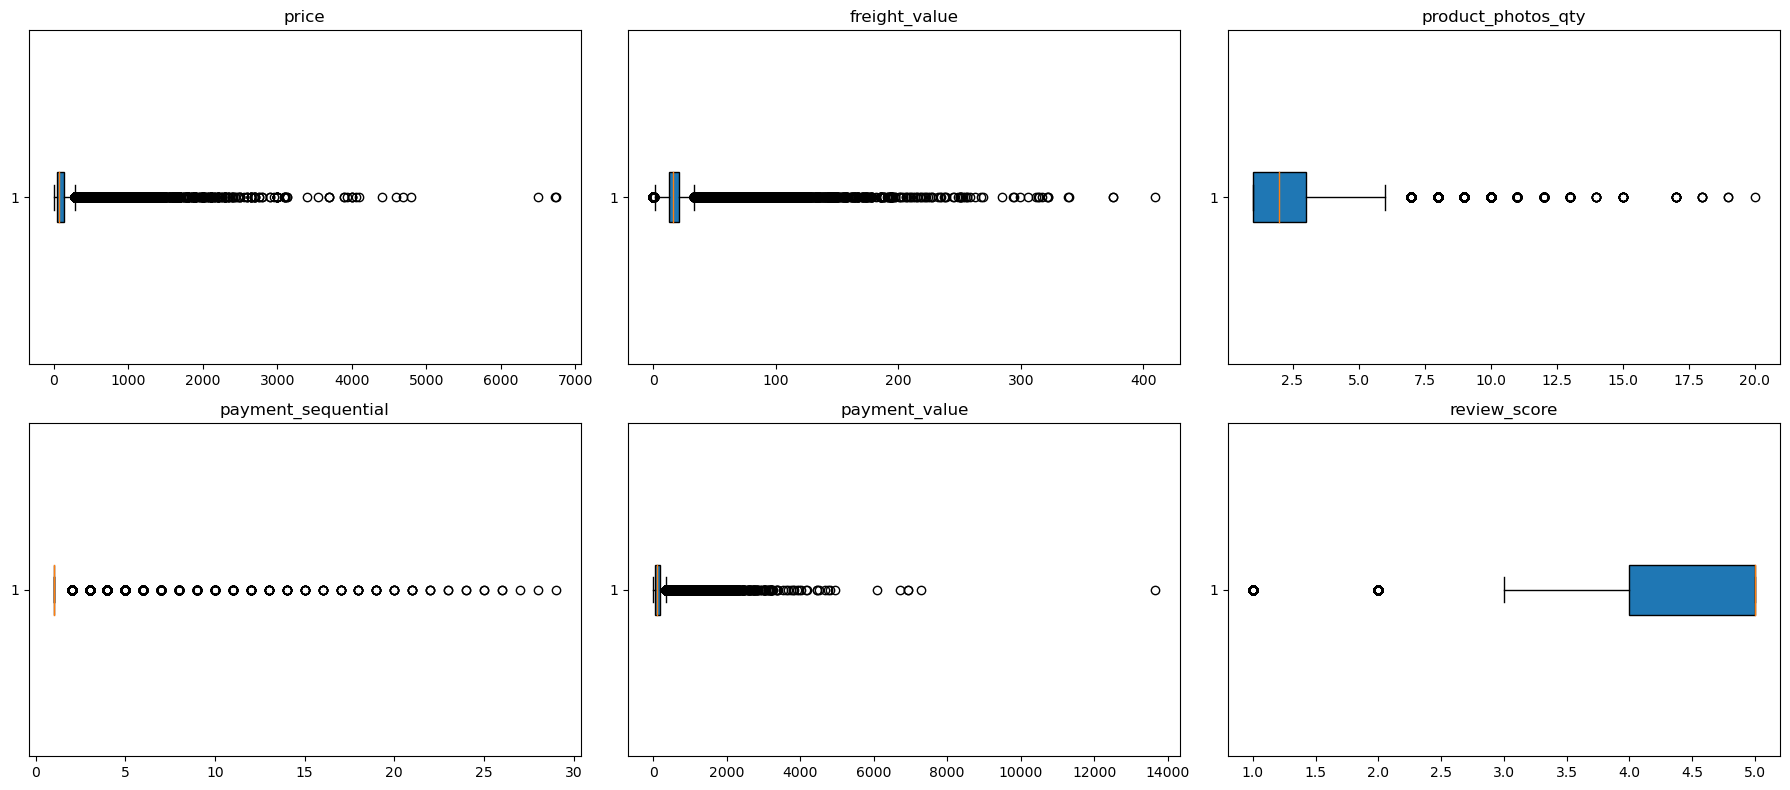

In [32]:
# List of numeric columns
num_col = ['price', 'freight_value', 'product_photos_qty', 'payment_sequential', 'payment_value', 'review_score']

# Create subplots with 3x2 grids and size 18x8
fig, ax = plt.subplots(2, 3, figsize=(18,8))

cnt = 0

# Loop through the grids
for i in range(2):

    if cnt >= 7:
            break

    for j in range(3):

        if cnt >= 7:
            break
        
        # We use boxplot from pyplot
        ax[i, j].boxplot(df[num_col[cnt]], vert=False, patch_artist=True)
        ax[i, j].set_title(str(num_col[cnt]), fontdict={'fontsize':12})

        # Increment counter
        cnt = cnt+1

# Make sure layout is not overlapping
fig.tight_layout()

In [33]:
#Import method copy
import copy

# Copy original dataset
df_olist = copy.deepcopy(df)

In [34]:
# Function to filter outlier
def capping_outlier(col):
    
    # Define upper limit and lower limit
    lwr_limit = df_olist[col].quantile(0.03)
    upr_limit = df_olist[col].quantile(0.97)

    print(str(col).upper())
    print("lwr:", lwr_limit, "upr:", upr_limit)
    print()
    
    # Filter outlier
    df_olist[col] = np.where(df_olist[col]> upr_limit, upr_limit, 
                                    np.where(df_olist[col]< lwr_limit, lwr_limit, df_olist[col]))

In [35]:
# List of column with outlier
outlier_col = ['price', 'freight_value', 'payment_value', 'product_photos_qty']

# Loop to apply the function for filtering outlier
for col in outlier_col:
    capping_outlier(col)

PRICE
lwr: 14.9 upr: 518.4014000000033

FREIGHT_VALUE
lwr: 7.47 upr: 57.89810000000012

PAYMENT_VALUE
lwr: 20.0 upr: 616.54

PRODUCT_PHOTOS_QTY
lwr: 1.0 upr: 6.0



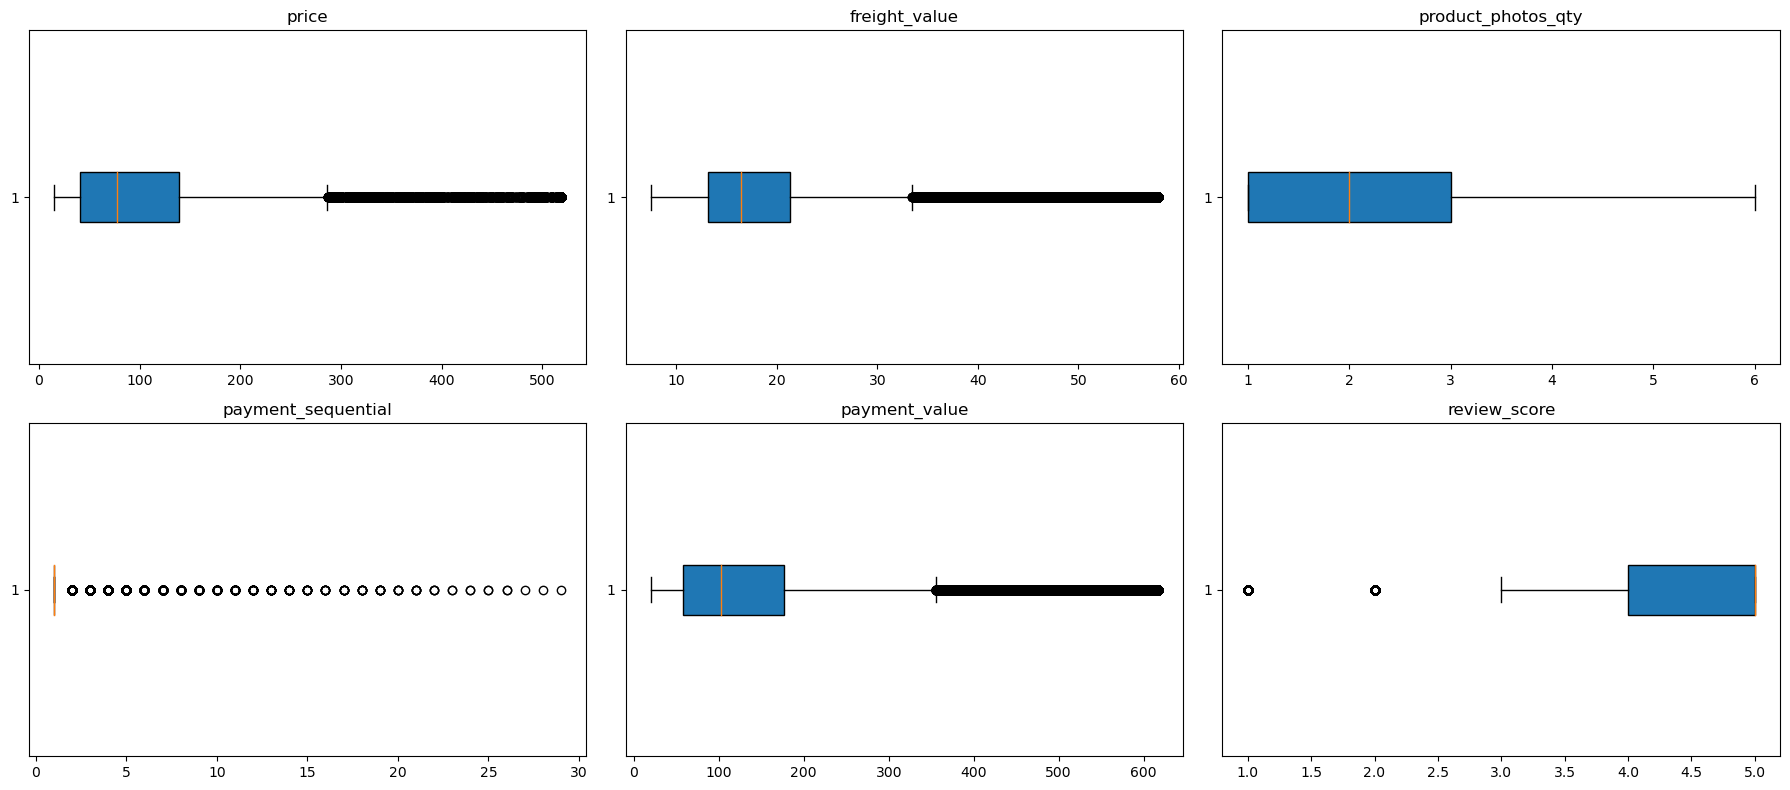

In [36]:
# List of numeric columns
num_col = ['price', 'freight_value', 'product_photos_qty', 'payment_sequential', 'payment_value', 'review_score']

# Create subplots with 3x2 grids and size 18x8
fig, ax = plt.subplots(2, 3, figsize=(18,8))

cnt = 0

# Loop through the grids
for i in range(2):

    if cnt >= 7:
            break

    for j in range(3):

        if cnt >= 7:
            break
        
        # We use boxplot from pyplot
        ax[i, j].boxplot(df_olist[num_col[cnt]], vert=False, patch_artist=True)
        ax[i, j].set_title(str(num_col[cnt]), fontdict={'fontsize':12})

        # Increment counter
        cnt = cnt+1

# Make sure layout is not overlapping
fig.tight_layout()

In [37]:
# Copy dataset after preprocessing and cleaning
df_olist = copy.deepcopy(df_olist)
df_olist.head()

,order_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,product_id,seller_id,price,freight_value,product_photos_qty,payment_sequential,payment_type,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,year,month,date
0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-06-05 00:00:00,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,124.99,21.8800,1.0,1,credit_card,146.87,4,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,office_furniture,2017,5,16
1,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-06-13 00:00:00,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,139.94,17.7900,1.0,1,credit_card,157.73,5,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,office_furniture,2018,5,19
2,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-04-10 00:00:00,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,149.94,23.3600,1.0,1,credit_card,173.30,5,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,office_furniture,2018,3,13
3,997fd4b37386d10b57d4ac8cdec011a6,delivered,2018-07-08 09:59:19,2018-08-16 00:00:00,8ed094bfe076c568f6bb10feada3f75d,7c67e1448b00f6e969d365cea6b010ab,199.98,57.8981,1.0,1,credit_card,315.75,1,07d190f123147d9e89d4b922543d7948,65075,sao luis,MA,office_furniture,2018,7,8
4,b63fff1ef8b6201df68bb611ee41129e,delivered,2017-04-02 22:15:27,2017-05-08 00:00:00,aba86c093ccdbac75b09111d57e50004,7c67e1448b00f6e969d365cea6b010ab,129.60,16.6100,1.0,1,ticket,146.21,4,332cf4e83e16004ba7dca932ce82475b,90010,porto alegre,RS,office_furniture,2017,4,2


In [38]:
df_olist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105692 entries, 0 to 116575
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       105692 non-null  object        
 1   order_status                   105692 non-null  object        
 2   order_purchase_timestamp       105692 non-null  datetime64[ns]
 3   order_estimated_delivery_date  105692 non-null  object        
 4   product_id                     105692 non-null  object        
 5   seller_id                      105692 non-null  object        
 6   price                          105692 non-null  float64       
 7   freight_value                  105692 non-null  float64       
 8   product_photos_qty             105692 non-null  float64       
 9   payment_sequential             105692 non-null  int32         
 10  payment_type                   105692 non-null  object        
 11  

## Data Visualization

In [40]:
# Group by top 10 products category by Total Order and Total Monetary
products_by_order = df_olist.groupby('product_category_name').count()[['order_id']].sort_values(by='order_id', ascending=False).reset_index()[:10]
product_by_payment_value = df_olist.groupby('product_category_name').sum()[['payment_value']].sort_values(by='payment_value', ascending=False).reset_index()[:10]

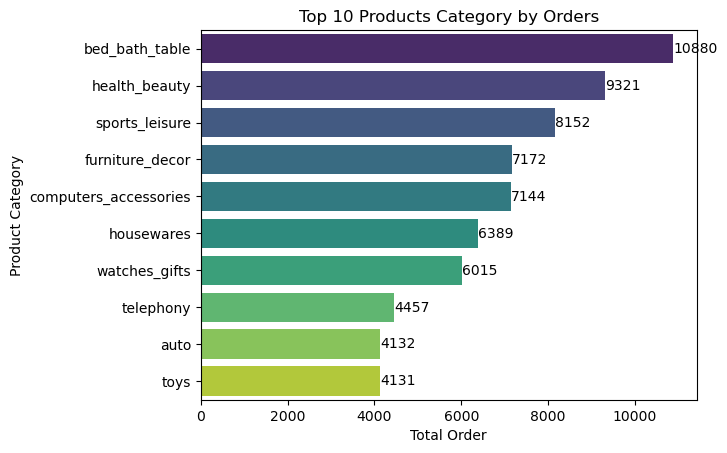

In [53]:
# use sns barplot to plot bar plot
# between days and tip value
ax = sns.barplot(data=products_by_order, x='order_id', y='product_category_name', palette='viridis')
 
# now simply assign the bar values to
# each bar by passing containers method
# to bar_label function
ax.bar_label(ax.containers[0])

ax.set_title("Top 10 Products Category by Orders", fontdict={'fontsize':12})
ax.set_xlabel("Total Order", fontdict={'fontsize':10})
ax.set_ylabel("Product Category", fontdict={'fontsize':10})

# Make sure layout is not overlapping
fig.tight_layout()

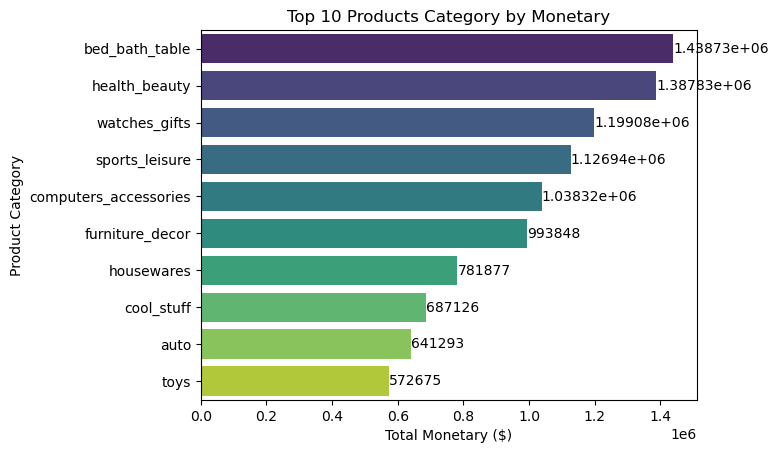

In [51]:
# use sns barplot to plot bar plot
# between days and tip value
ax = sns.barplot(data=product_by_payment_value, x='payment_value', y='product_category_name', palette='viridis')
 
# now simply assign the bar values to
# each bar by passing containers method
# to bar_label function
ax.bar_label(ax.containers[0])

ax.set_title("Top 10 Products Category by Monetary", fontdict={'fontsize':12})
ax.set_xlabel("Total Monetary (\$)", fontdict={'fontsize':10})
ax.set_ylabel("Product Category", fontdict={'fontsize':10})

# Make sure layout is not overlapping
fig.tight_layout()

In [43]:
# prepare the data
payment_type_col = df_olist["payment_type"].value_counts(normalize=True)*100
payment_type_col = payment_type_col.to_frame("count")
payment_type_col = payment_type_col.reset_index()
payment_type_col = payment_type_col.rename(columns={"index":"payment_type"})
payment_type_col["count"] = payment_type_col["count"].round(3)
payment_type_col

,payment_type,count
0,credit_card,74.073
1,ticket,18.977
2,voucher,5.479
3,debit_card,1.471


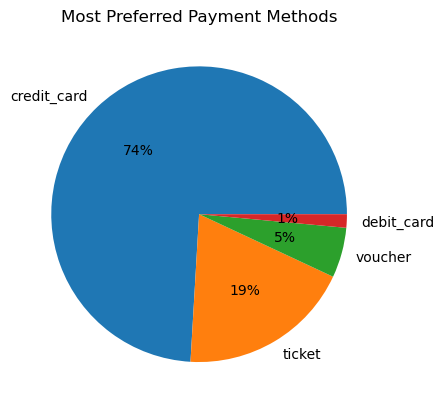

In [44]:
# plotting data on chart
plt.pie(data=payment_type_col, x="count",
        labels="payment_type", autopct='%.0f%%')
  
# displaying chart
plt.title("Most Preferred Payment Methods")
plt.show()

In [45]:
# Add new column for month-year
df_olist['month_year'] = df_olist['order_purchase_timestamp'].dt.strftime('%Y-%m')
df_olist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105692 entries, 0 to 116575
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       105692 non-null  object        
 1   order_status                   105692 non-null  object        
 2   order_purchase_timestamp       105692 non-null  datetime64[ns]
 3   order_estimated_delivery_date  105692 non-null  object        
 4   product_id                     105692 non-null  object        
 5   seller_id                      105692 non-null  object        
 6   price                          105692 non-null  float64       
 7   freight_value                  105692 non-null  float64       
 8   product_photos_qty             105692 non-null  float64       
 9   payment_sequential             105692 non-null  int32         
 10  payment_type                   105692 non-null  object        
 11  

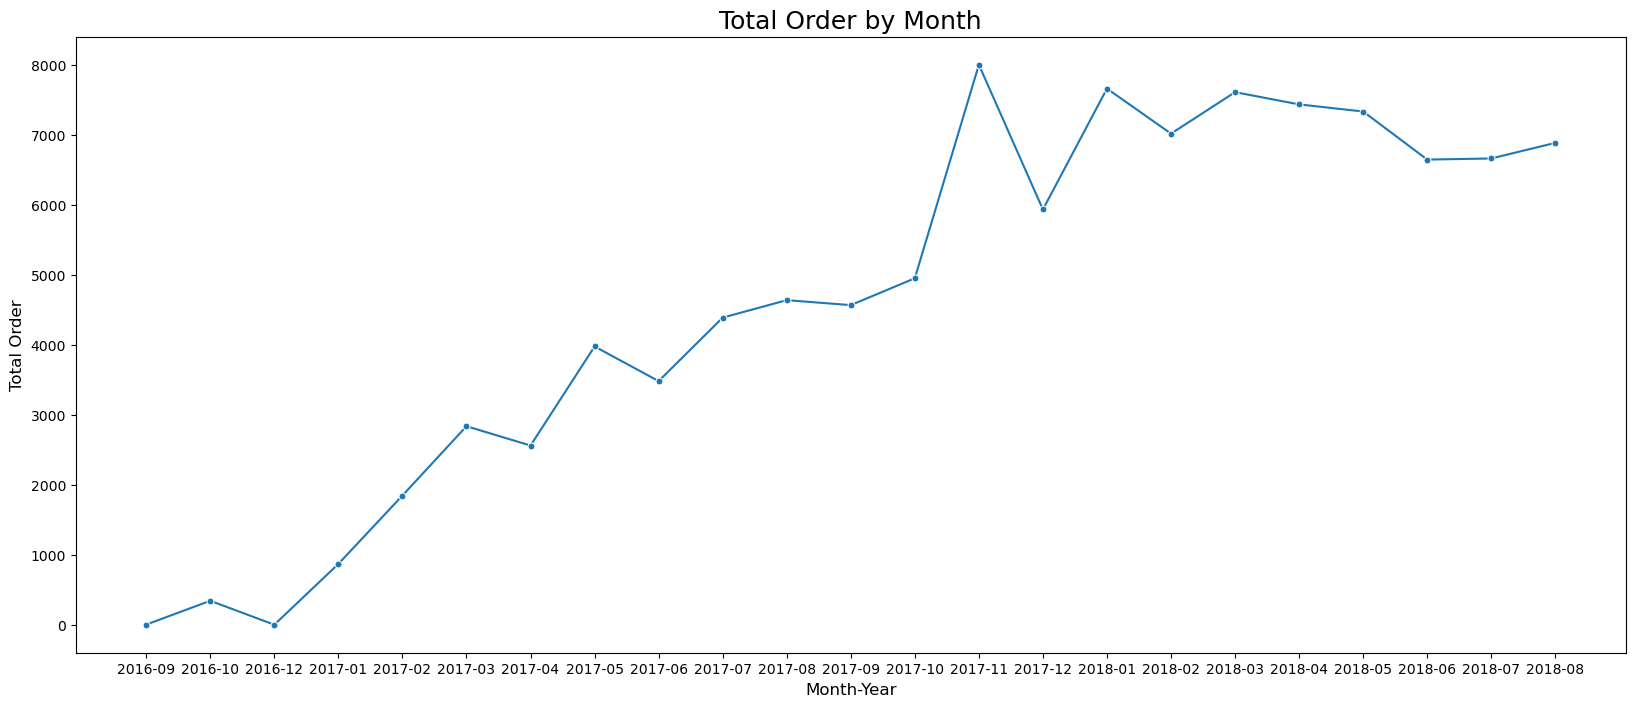

In [47]:
# Group by order
order_per_month = df_olist.groupby(['month_year']).count()[['order_id']]

# Exclude last month because only 1 records found
order_per_month = order_per_month.iloc[:-1]

# Visualization
fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.lineplot(data=order_per_month, marker='o', markersize=5, color='green', label='Total Order')
ax.set_title('Total Order by Month', fontsize=18)
ax.set_xlabel('Month-Year', fontsize=12)
ax.set_ylabel('Total Order', fontsize=12)
ax.get_legend().remove()

Text(24.000000000000014, 0.5, 'Payment Method')

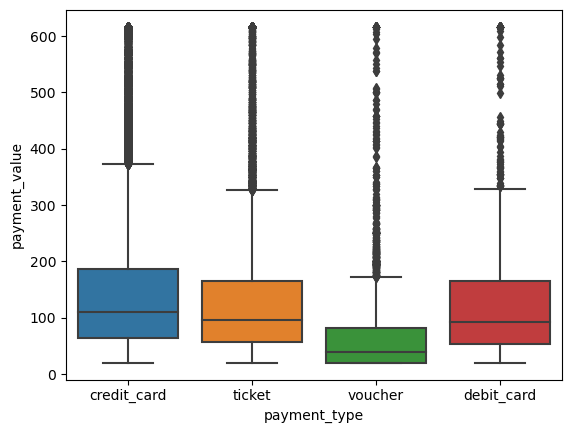

In [54]:
# Plot boxplot [0]
sns.boxplot(data=df_olist, y="payment_value", x="payment_type")
ax.set_title('Distribution of Payment Method by Payment Value', fontsize=18)
ax.set_xlabel('Payment Value',  fontdict={'fontsize':10})
ax.set_ylabel('Payment Method', fontdict={'fontsize':10})

Text(0, 0.5, 'Total Order')

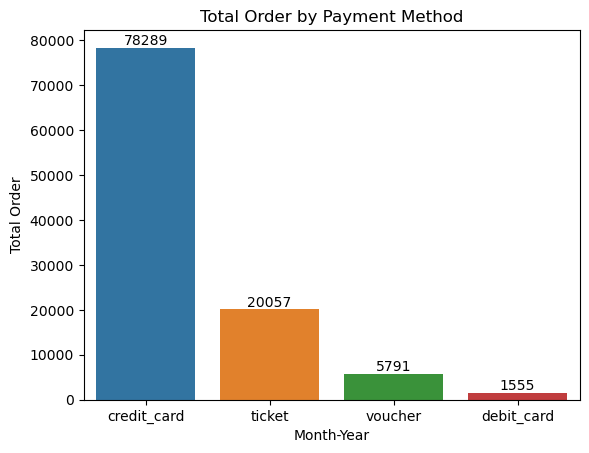

In [58]:
# Plot countplot [0]
ax = sns.countplot(data=df_olist, x="payment_type")

# now simply assign the bar values to
# each bar by passing containers method
# to bar_label function
ax.bar_label(ax.containers[0])

ax.set_title('Total Order by Payment Method', fontdict={'fontsize':12})
ax.set_xlabel('Month-Year',  fontdict={'fontsize':10})
ax.set_ylabel('Total Order',  fontdict={'fontsize':10})

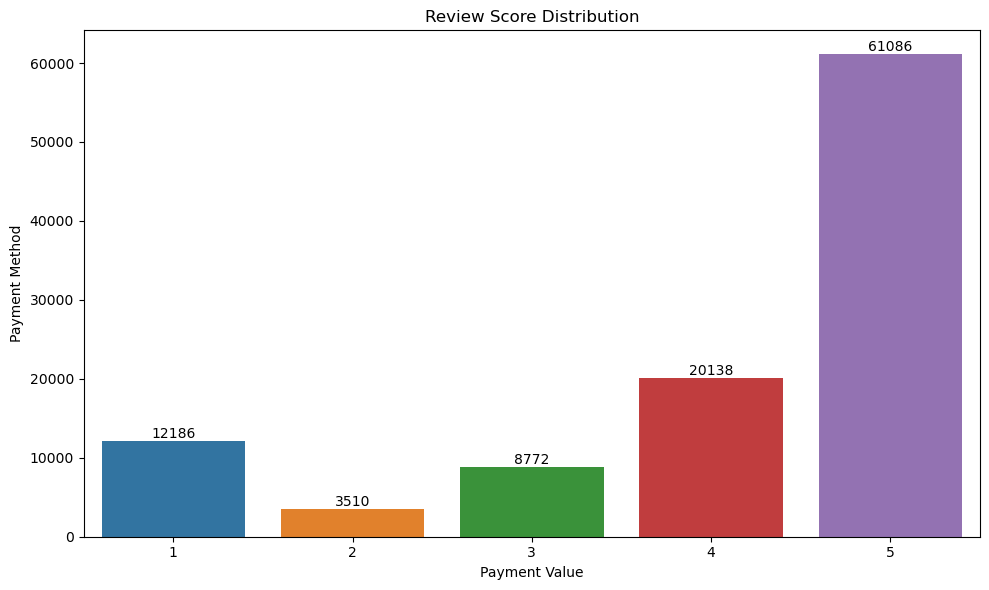

In [60]:
# Create subplots size 10,6
fig, ax = plt.subplots(figsize=(10,6))

# Plot countplot
ax = sns.countplot(data=df_olist, x="review_score")
ax.set_title('Review Score Distribution', fontdict={'fontsize':12})
ax.set_xlabel('Payment Value',  fontdict={'fontsize':10})
ax.set_ylabel('Payment Method', fontdict={'fontsize':10})

# now simply assign the bar values to
# each bar by passing containers method
# to bar_label function
ax.bar_label(ax.containers[0])

# Make sure layout is not overlapping
fig.tight_layout()